# Example 10.6: Rankine with Reheat and CFH Regeneration

*John F. Maddox, Ph.D., P.E.<br>
University of Kentucky - Paducah Campus<br>
ME 321: Engineering Thermodynamics II<br>*

## Problem Statement
A superheat steam power plant with reheat has a turbine inlet at $3\ \mathrm{MPa}$ and $550^\circ\mathrm{C}$.  After expansion to $400\ \mathrm{kPa}$, a fraction of the steam is extracted and used in a regeneration process with an Closed Feedwater Heater (OFH) where the exit of the hot stream in the CHF is saturated liquid at $400\ \mathrm{kPa}$ and the regenerator effectiveness is $\varepsilon_\text{regen}=0.9$ relative to the saturation temperature of the cold stream.  The remaining steam is reheated to $550^\circ\mathrm{C}$ and then expanded to $15\ \mathrm{kPa}$.  For isentropic efficiencies of $\eta_t=0.8$ and $\eta_p=0.6$ find:
* (a) Specific net work (kJ/kg)
* (c) Thermal efficiency of the cycle
* (d) Sketch a $T$-$s$ diagram of the cycle

## Solution

__[Video Explanation](https://uky.yuja.com/V/Video?v=2140138&node=7988538&a=617372132&autoplay=1)__

### Python Initialization
We'll start by importing the libraries we will use for our analysis and initializing dictionaries to hold the properties we will be usings.

In [1]:
from kilojoule.templates.kSI_C import *
water = realfluid.Properties('Water')

### Given Parameters
We now define variables to hold our known values.

In [2]:
T[4] = Quantity(550,'degC')      # Turbine inlet temperature
p[4] = Quantity(3,'MPa')         # Turbine inlet pressure
p[5] = Quantity(400,'kPa')       # Pressure after first expansion
T[6] = Quantity(550,'degC')      # Reheat temperature
p[7] = Quantity(15,'kPa')        # Pressure after second expansion
eta_t = Quantity(0.8,'')         # Turbine isentropic efficiency
eta_p = Quantity(0.6,'')         # Pump isentropic efficiency
epsilon_regen = Quantity(0.9,'') # regenerator effectiveness

Summary();

<IPython.core.display.Latex object>

,T,p
unit,°C,kPa
4,550.0,3000.0
5,-,400.0
6,550.0,-
7,-,15.0


### Assumptions
- Non-ideal work devices
- Superheat in boiler: superheated vapor at boiler exit
- Single phase into pump: saturated liquid at condenser exit
- Isobaric heat exchagners
- Negligible changes in kinetic energy
- Negligible changes in potential energy

In [3]:
x[1] = 0            # Single phase into pump
x[8] = 0            # Single phase out of CFH
p[1] = p[9] = p[7]  # isobaric heat exchanger
p[6] = p[8] = p[5]  # isobaric heat exchanger
p[3] = p[2] = p[4]  # isobaric heat exchanger

Summary();

<IPython.core.display.Latex object>

,T,p,x
unit,°C,kPa,
1,-,15.0,0.0
2,-,3000.0,-
3,-,3000.0,-
4,550.0,3000.0,-
5,-,400.0,-
6,550.0,400.0,-
7,-,15.0,-
8,-,400.0,0.0
9,-,15.0,-


#### (a) Specific net work

In [4]:
%%showcalc
#### State 1) $T_1$,$v_1$,$h_1$,$s_1$ from $p_1$ and $x_1$
states.fix(1,water)

#### 1-2) Non-ideal compression
# Isentropic compression
p['2s'] = p[2]
s['2s'] = s[1]
# Fix $2_s$ from $p_{2s}$ and $s_{2s}$
states.fix('2s',water)

# Actual compression
h[2] = h[1] + (h['2s']-h[1])/eta_p
# Fix $2$ with $h_2$ and $p_2$
states.fix(2,water)

#### 3-4) Isobaric heat addition
# Fix state $4$ with $T_4$ and $p_4$
states.fix(4,water)

#### 4-5) Non-ideal expansion
# Isentropic Expansion
p['5s'] = p[5]
s['5s'] = s[4]
states.fix('5s',water)
# Actual expansion
h[5] = h[4] - eta_t*(h[4]-h['5s'])
# Fix state $5$ with $p_5$ and $h_5$
states.fix(5,water)

#### 5-6) Reheat - Isobaric heat addition
# Fix state $6$ with $T_6$ and $p_6$
states.fix(6,water)

#### 6-7) Non-ideal expansion
# Isentropic Expansion
p['7s'] = p[7]
s['7s'] = s[6]
h['7s'] = water.h(p['7s'],s['7s'])
states.fix('7s',water)
# Actual expansion
h[7] = h[6] - eta_t*(h[6]-h['7s'])
states.fix(7,water)

#### CFH Analysis
# State 8 fixed by $x_8$, $p_8$
states.fix(8,water)
# Heat exchanger effectiveness
q_2_to_3_max = h[8]-h[2]
q_2_to_3 = epsilon_regen*(q_2_to_3_max)
h[3] = h[2] + q_2_to_3
states.fix(3,water)
y = (h[3]-h[2])/(h[5]-h[8])

#### Throttle regenerator flow to condensor pressure
# Isenthalpic expansion 
h[9] = h[8]
states.fix(9,water)

#### Work 
w_1_to_2 = h[1]-h[2]
w_4_to_5 = h[4]-h[5]
w_6_to_7 = (1-y)*(h[6]-h[7])
w_net = w_1_to_2 + w_4_to_5 + w_6_to_7

### State 1) $T_1$,$v_1$,$h_1$,$s_1$ from $p_1$ and $x_1$

### 1-2) Non-ideal compression

 Isentropic compression

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Fix $2_s$ from $p_{2s}$ and $s_{2s}$

 Actual compression

<IPython.core.display.Latex object>

 Fix $2$ with $h_2$ and $p_2$

### 3-4) Isobaric heat addition

 Fix state $4$ with $T_4$ and $p_4$

### 4-5) Non-ideal expansion

 Isentropic Expansion

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Actual expansion

<IPython.core.display.Latex object>

 Fix state $5$ with $p_5$ and $h_5$

### 5-6) Reheat - Isobaric heat addition

 Fix state $6$ with $T_6$ and $p_6$

### 6-7) Non-ideal expansion

 Isentropic Expansion

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

 Actual expansion

<IPython.core.display.Latex object>

### CFH Analysis

 State 8 fixed by $x_8$, $p_8$

 Heat exchanger effectiveness

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

### Throttle regenerator flow to condensor pressure

 Isenthalpic expansion 

<IPython.core.display.Latex object>

### Work 

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

<IPython.core.display.Latex object>

In [5]:
states.display();

,T,p,v,u,h,s,x,phase
unit,°C,kPa,m³/kg,kJ/kg,kJ/kg,kJ/K/kg,,
1,53.969313,15.0,0.001014,225.929071,225.944282,0.754865,0,twophase
2,54.566922,3000.0,0.001013,227.946954,230.985965,0.761023,N/A,liquid
2s,54.084027,3000.0,0.001013,225.930994,228.969291,0.754865,N/A,liquid
3,134.474626,3000.0,0.001072,564.070242,567.287696,1.679000,N/A,liquid
4,550.000000,3000.0,0.124368,3196.597544,3569.702948,7.376848,N/A,supercritical_gas
5,308.262535,400.0,0.664687,2818.171292,3084.046040,7.597079,N/A,gas
5s,249.104089,400.0,0.594118,2724.984690,2962.631813,7.376848,N/A,gas
6,550.000000,400.0,0.947510,3214.583450,3593.587361,8.328669,N/A,supercritical_gas
7,204.912614,15.0,14.698171,2668.460515,2888.933076,8.737496,N/A,gas


#### (b) Thermal efficiency

In [6]:
%%showcalc
#### Boiler First Law
q_in = h[4]-h[3] + (1-y)*(h[6]-h[5])

#### Thermal efficiency
eta_th = w_net/q_in
eta_th.ito('')

### Boiler First Law

<IPython.core.display.Latex object>

### Thermal efficiency

<IPython.core.display.Latex object>

#### (d) Diagrams

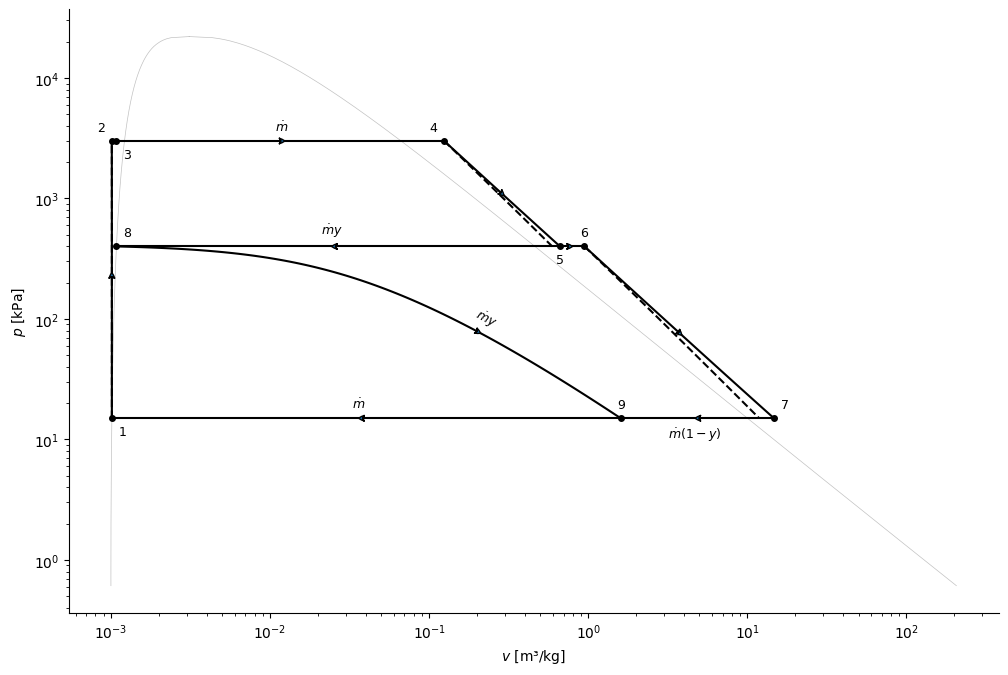

In [7]:
pv = water.pv_diagram()

pv.plot_state(states[1],label_loc='south east')
pv.plot_state(states[2],label_loc='north west')
pv.plot_state(states[3],label_loc='south east')
pv.plot_state(states[4],label_loc='north west')
pv.plot_state(states[5],label_loc='south')
pv.plot_state(states[6],label_loc='north')
pv.plot_state(states[7],label_loc='north east')
pv.plot_state(states[8],label_loc='northeast')
pv.plot_state(states[9])

pv.plot_process(states[1],states[2],path='nonideal')
pv.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[2],states[3],path='isobaric',arrow=False)
pv.plot_process(states[3],states[4],path='isobaric',label='$\dot{m}$')
pv.plot_process(states[4],states[5],path='nonideal')
pv.plot_process(states[4],states['5s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[5],states[6],path='isobaric')
pv.plot_process(states[6],states[7],path='nonideal')
pv.plot_process(states[6],states['7s'],path='isentropic',linestyle='dashed',arrow=False)
pv.plot_process(states[7],states[9],path='isobaric',label='$\dot{m}(1-y)$',labelprops=dict(va='top'))
pv.plot_process(states[5],states[8],path='isobaric',label='$\dot{m}y$')
pv.plot_process(states[8],states[9],path='isenthalpic',label='$\dot{m}y$')
pv.plot_process(states[9],states[1],path='isobaric',label='$\dot{m}$');


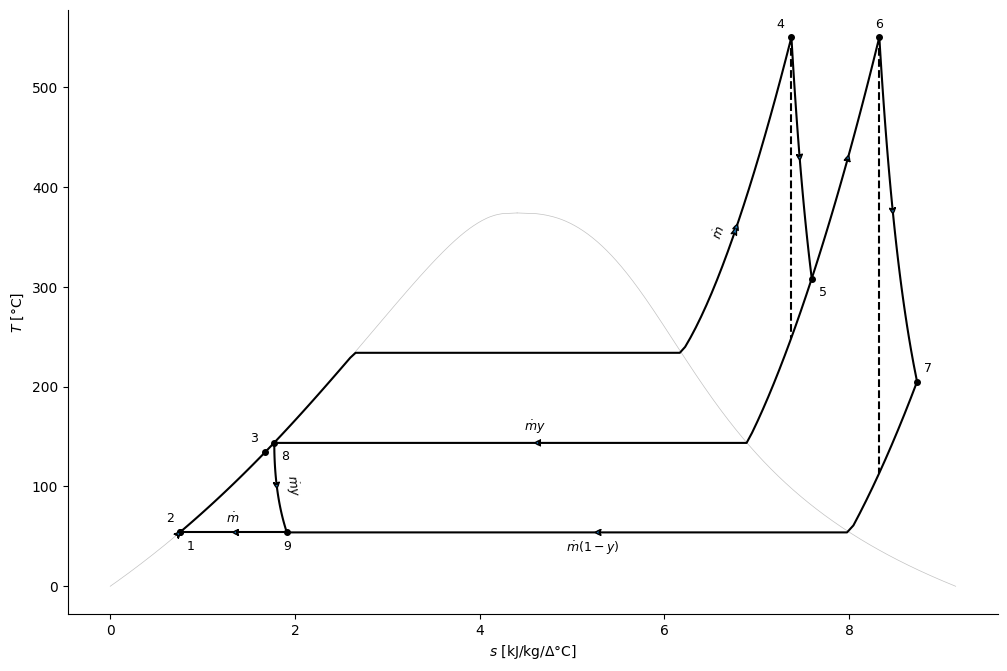

In [10]:
Ts = water.Ts_diagram()

Ts.plot_state(states[1],label_loc='south east')
Ts.plot_state(states[2],label_loc='north west')
Ts.plot_state(states[3],label_loc='north west')
Ts.plot_state(states[4],label_loc='north west')
Ts.plot_state(states[5],label_loc='south east')
Ts.plot_state(states[6],label_loc='north')
Ts.plot_state(states[7],label_loc='north east')
Ts.plot_state(states[8],label_loc='south east')
Ts.plot_state(states[9],label_loc='south')

Ts.plot_process(states[1],states[2],path='nonideal')
Ts.plot_process(states[1],states['2s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[2],states[3],path='isobaric',arrow=False)
Ts.plot_process(states[3],states[4],path='isobaric',label='$\dot{m}$')
Ts.plot_process(states[4],states[5],path='nonideal')
Ts.plot_process(states[4],states['5s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[5],states[6],path='isobaric')
Ts.plot_process(states[6],states[7],path='nonideal')
Ts.plot_process(states[6],states['7s'],path='isentropic',linestyle='dashed',arrow=False)
Ts.plot_process(states[7],states[9],path='isobaric',label='$\dot{m}(1-y)$',labelprops=dict(va='top'))
Ts.plot_process(states[5],states[8],path='isobaric',label='$\dot{m}y$')
Ts.plot_process(states[8],states[9],path='isenthalpic',label='$\dot{m}y$')
Ts.plot_process(states[9],states[1],path='isobaric',label='$\dot{m}$');
